## Assignment DSP AT2

### Mental Health and Suicide Rate Analysis

** Team Member: **
<br> Hnin Pwint Tin (13738339)
<br> Irfan Sampe (13840121)
<br> Ki Ming Wong (13731738) 
<br> Mo Hussain (13524766)
##### Priyanka Srinivasa (13684182)

We have selected Mental Health and Suicide rate dataset from Kaggle. Suicide is a global health issue. According to WHO (2020), “Close to 800 000 people die due to suicide every year, which is a global phenomenon and occurs throughout the lifespan”. The goal of our exploratory analysis is to find relationships in few key dimensions. Firstly, the economic condition of a country and the mental health care services it provides for the public has any correlation on suicide rates. Secondly, how the outcome differs in Sex types e.g. Male and Female. Finally, our analysis focuses on different age groups to contextualise the Suicide trends and also find associate factors relationships. 

It is worthwhile mentioning that Git will be the ultimate focus point of this assignment. Git’s social coding enable a software developer to easily share his activities and interest to other developers. Developers can thus track activities relevant to various projects. Rightly so, our group main focus would be to use Git extensively for different aspects of this project.

In [1]:
# ========= Import the packages =========
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Customised Common Data Reader Class
from common_lib.data_reader import SuicideDataReader, SuicideRawData, SuicideProcessedData

### 1. Worldwide Suicide Rate Distribution in 2016

Suicide occurs throughout the world. Its effects individuals of all nations, cultures, religions, genders and age ranges. This analysis aims to investigate to what extent how many countries are prevalent to suicidal death

In [2]:
# ========= Getting Data =========

# Use common Data Reader Class to load data
data_reader = SuicideDataReader("../")

# Load Suicide Rate Tiday data done with Pivot Longer the rate of all age ranges
suicide_rate_data = data_reader.read_data(SuicideProcessedData.SUICIDE_RATES)
suicide_rate_data.head()

,country,sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19,all_age
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1,93.2
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8,157.1
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2,35.1
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0,65.1
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1,86.3


In [3]:
# This function serves to categorise (discretize)  the continuous variable value - 'suicide rate'
# Binning into 4 ranges of suicide rate
def suicide_rate_classification(rate):
    #rate = data[['all_age']]
    if (rate > 0 and rate <= 100):
        return "0-100"
    elif (rate > 100 and rate <=200):
        return "100-200"
    elif (rate >200 and rate <= 300):
        return "200-300"
    elif (rate > 300 and rate <= 400):
        return "300-400"
    else :
        return ">400"

# ====== Prepare Data for Plot (1) ======
# Filter the data for Both Sex only
suicide_rate_allage_bothsex = suicide_rate_data[suicide_rate_data["sex"] == "Both sexes"][["country", "sex", "all_age"]]
    
# Trigger the discretization function and store the result into the new column "suicide_rate_class"   
suicide_rate_allage_bothsex = suicide_rate_allage_bothsex.\
    assign(suicide_rate_class = lambda x: x["all_age"].map(lambda y: suicide_rate_classification(y)))

suicide_rate_allage_bothsex

,country,sex,all_age,suicide_rate_class
0,Afghanistan,Both sexes,93.2,0-100
3,Albania,Both sexes,65.1,0-100
6,Algeria,Both sexes,38.8,0-100
9,Angola,Both sexes,165.8,100-200
12,Antigua and Barbuda,Both sexes,8.1,0-100
...,...,...,...,...
534,Venezuela (Bolivarian Republic of),Both sexes,43.3,0-100
537,Viet Nam,Both sexes,89.4,0-100
540,Yemen,Both sexes,92.1,0-100
543,Zambia,Both sexes,204.9,200-300


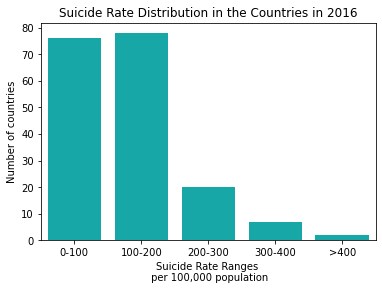

In [4]:
#=========== Plotting (1)==============#

# The plot to visualise how many countries are in each range of suicide rate
sns.countplot(x="suicide_rate_class", data=suicide_rate_allage_bothsex, color="c")
plt.title("Suicide Rate Distribution in the Countries in 2016")
plt.ylabel("Number of countries")
plt.xlabel("Suicide Rate Ranges \n per 100,000 population")
plt.show()

The plots above illustrate the suicide rates in 4 ranges such as the rate between 0 and 100, from 100 to 200, from 200 to 300 and above 400 per 100,00 population in X-axis. The Y-axis shows the number of countries. 

The plot illustrates the general overview of the number of countries in each range of suicidal death rate. Out of 183 countries in the dataset, 145 countries have suicide rate between 0 to 200. The rest of the 38 countries have the rate 200 to beyond 400

In [5]:
# ====== Prepare Data for Plot (2) ======

# Filter the data for male and female only 
suicide_rate_cat_by_sex = suicide_rate_data[suicide_rate_data['sex'] != 'Both sexes'][["country", "sex", "all_age"]]
# Trigger the discretization function to bin the suicide rate
suicide_rate_cat_by_sex = suicide_rate_cat_by_sex.assign(suicide_rate_class = lambda x: x["all_age"].map(lambda y: suicide_rate_classification(y)))
suicide_rate_cat_by_sex

,country,sex,all_age,suicide_rate_class
1,Afghanistan,Male,157.1,100-200
2,Afghanistan,Female,35.1,0-100
4,Albania,Male,86.3,0-100
5,Albania,Female,46.1,0-100
7,Algeria,Male,56.2,0-100
...,...,...,...,...
542,Yemen,Female,58.4,0-100
544,Zambia,Male,343.6,300-400
545,Zambia,Female,102.1,100-200
547,Zimbabwe,Male,584.7,>400


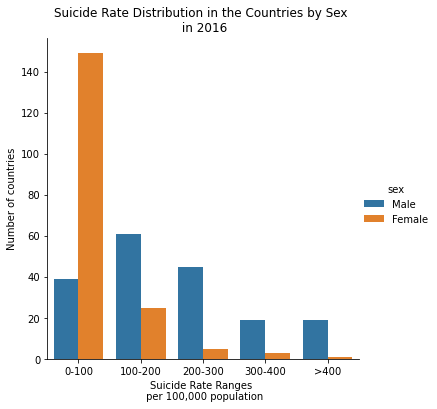

In [6]:
#=========== Plotting (2)==============#

# The plot is to visualise and compare the variation of number of counties in Male-Female distribution of suicide rates 

rate_bin_list=["0-100", "100-200", "200-300", "300-400", ">400"]

##https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="suicide_rate_class", hue="sex", kind="count", data=suicide_rate_cat_by_sex, order=rate_bin_list)
plt.title("Suicide Rate Distribution in the Countries by Sex \n in 2016")
plt.ylabel("Number of countries")
plt.xlabel("Suicide Rate Ranges \n per 100,000 population")
plt.show()

The second plot visualises the comparison between male and female distribution within the suicide rate ranges. The female suicide rate is below 100 in majority of the 145 countries in the world as the outstanding orange bar explains. The suicide rate among males remain dominant in about 140 courtiers having the rate from 100 and beyond 400. It is quite alarming that around 80 countries over the world experience the male suicide rate over 400

In [7]:
# Load Suicide Rate Tiday data done with Pivot Longer the rate of all age ranges
suicide_rate_datatidy = data_reader.read_data(SuicideProcessedData.SUICIDE_RATES, tidy=True)
print(suicide_rate_datatidy.head(10))

       country         sex age_range  suicide_rate
0  Afghanistan  Both sexes  80_above          42.0
1  Afghanistan        Male  80_above          70.4
2  Afghanistan      Female  80_above          20.1
3      Albania  Both sexes  80_above          16.3
4      Albania        Male  80_above          23.2
5      Albania      Female  80_above          10.9
6      Algeria  Both sexes  80_above           9.4
7      Algeria        Male  80_above          12.7
8      Algeria      Female  80_above           6.4
9       Angola  Both sexes  80_above          63.5


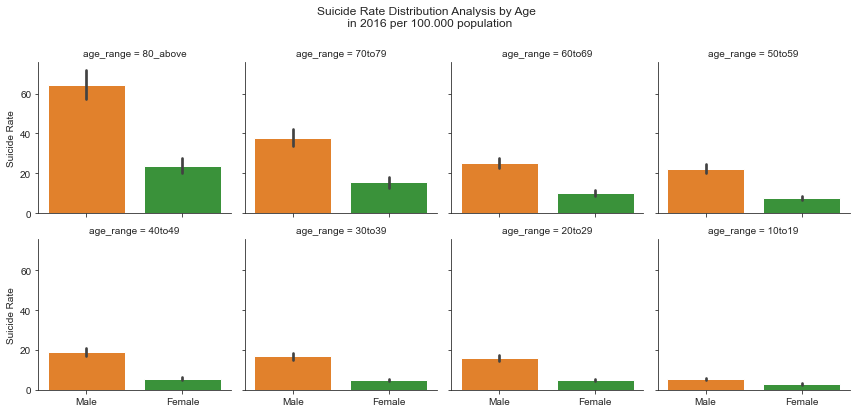

In [8]:
# ========= Plotting  =========
# Plotting is to visualise the suicide rate distribution in FacetGrid
sns.set_style("ticks")

age_plot = sns.FacetGrid(suicide_rate_datatidy, hue="sex", col="age_range", col_wrap=4)
age_plot.map(sns.barplot,"sex", "suicide_rate", order=["Male", "Female"])

age_plot.set_axis_labels("", "Suicide Rate")

# This is to adjust the axis and display the main title
# without it, seaborn's facet titles and the main title are overlapped
plt.subplots_adjust(top=0.85)
age_plot.fig.suptitle("Suicide Rate Distribution Analysis by Age \n in 2016 per 100.000 population")
plt.show()

The third plot attempts to visualise how suicide rate varies over different age groups in male and female. Across all the age groups, the death by suicide is the highest in the octogenarian. According to the World Health Organisation, the suicide rate in South Korea is the 10th highest in the world. One factor in its highest rate is the suicidal death among the elderly. 

Traditionally, children have been expected to care for their aging parents; however, because this system has mostly disappeared in the twenty-first century, many greying populations commit suicide, so they do not feel like they are a financial burden on their families. This reflects in our analysis and plots well. The first row in the third plot demonstrate the rate among 50-59 and senior citizens corporately higher than younger adults and teens.

In every age group, males are always in higher suicide rates than females. The working age group from 20 to 49 seem to be same in Male and Female with about 20 and 5 respectively.


### 2. Top 10 countries with least suicide rates of Male, and Female

The year 2020 has been a challenging year for most of us. With self-isolation, fear of losing jobs, and uncertainty creeping on us, it is difficult to remain balanced, and optimistic. All these factors can lead to mental illness, which might result in suicidal thoughts or the death itself. While analysing the countries with most suicide rates can give us an idea about the amount of help that can be offered for the people in those countries, analysing countries with least suicide rates might allow us to understand, and implement some of the strategies applied by the countries with the lowest suicide rates. The purpose of this analysis is to gain meaningful insights to take effective measures to prevent the cause.  

In [9]:
# ========= Prepare Data for plot (1) ========= #

# Filter for countries with female only 
suicide_rate_data_female = suicide_rate_data[suicide_rate_data["sex"] == "Female"]

# Sort the suicide rate of population in all ages inclusively
sort_female = suicide_rate_data_female.sort_values("all_age")
sort_female.head()

,country,sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19,all_age
416,Saint Vincent and the Grenadines,Female,0.0,0.0,0.0,0.0,1.4,1.4,0.0,3.0,5.8
32,Bahamas,Female,2.4,1.3,0.9,0.8,0.5,0.2,0.4,0.6,7.1
41,Barbados,Female,0.0,7.8,0.0,0.0,0.0,0.0,0.0,0.0,7.8
515,United Arab Emirates,Female,3.3,1.4,1.6,1.4,0.9,0.8,1.0,0.3,10.7
248,Jamaica,Female,4.3,2.1,1.2,1.0,1.0,1.0,1.3,0.9,12.8


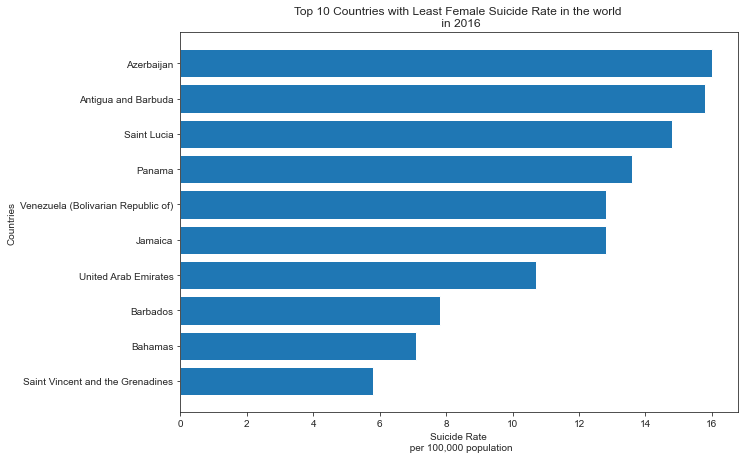

In [10]:

#=========== Plotting (1)==============#

Country = sort_female["country"].head(10) 
Total = sort_female["all_age"].head(10)
# Figure Size 
fig = plt.figure(figsize =(10, 7)) 
  
# Horizontal Bar Plot 
plt.barh(Country, Total) 
plt.title("Top 10 Countries with Least Female Suicide Rate in the world \n in 2016")
plt.ylabel("Countries")
plt.xlabel("Suicide Rate \n per 100,000 population")
plt.show()

In [11]:
# ========= Prepare Data for Plot (2) ========= #

# Filter for countries with male only 
suicide_rate_data_male = suicide_rate_data[suicide_rate_data["sex"] == "Male"]
# Sort the suicide rate of population in all ages inclusively
sort_male = suicide_rate_data_male.sort_values("all_age")
sort_male.head()

,country,sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19,all_age
13,Antigua and Barbuda,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,Kuwait,Male,0.0,0.0,4.0,3.7,2.7,3.3,4.9,1.3,19.9
40,Barbados,Male,26.6,0.0,0.0,0.6,0.9,0.8,0.0,0.0,28.9
199,Grenada,Male,0.0,0.0,29.4,0.0,0.0,0.0,0.0,0.0,29.4
367,Pakistan,Male,7.5,4.0,3.2,3.2,3.6,4.5,4.9,2.1,33.0


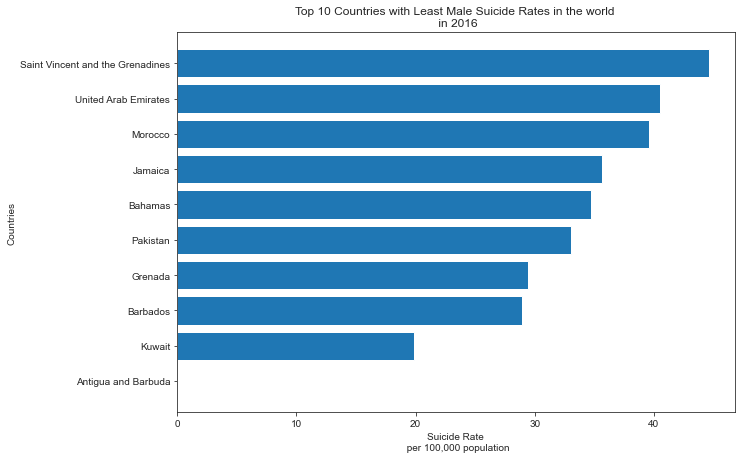

In [12]:
#=========== Plotting (2)==============#

country = sort_male["country"].head(10) 
total = sort_male["all_age"].head(10)
# Figure Size 
fig = plt.figure(figsize =(10, 7)) 
  
# Horizontal Bar Plot 
plt.barh(country, total) 
plt.title("Top 10 Countries with Least Male Suicide Rates in the world \n in 2016")
plt.ylabel("Countries")
plt.xlabel("Suicide Rate \n per 100,000 population") 
plt.show()

While there is a that there are good measures to prevent suicide in these countries, there can also be other factors such as, under reporting, and inappropriate data collection.  

### 3. Suicide rate comparison in different years

In [13]:
# ========= Prepare Data for Plot ========= #
age_standardized = data_reader.read_data(SuicideRawData.AGE_STANDARDIZED)
age_standardized

,country,sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2
...,...,...,...,...,...,...
544,Zambia,Male,17.5,17.4,17.9,21.9
545,Zambia,Female,6.2,6.1,6.2,7.5
546,Zimbabwe,Both sexes,19.1,18.9,20.6,21.7
547,Zimbabwe,Male,29.1,28.7,32.3,35.5


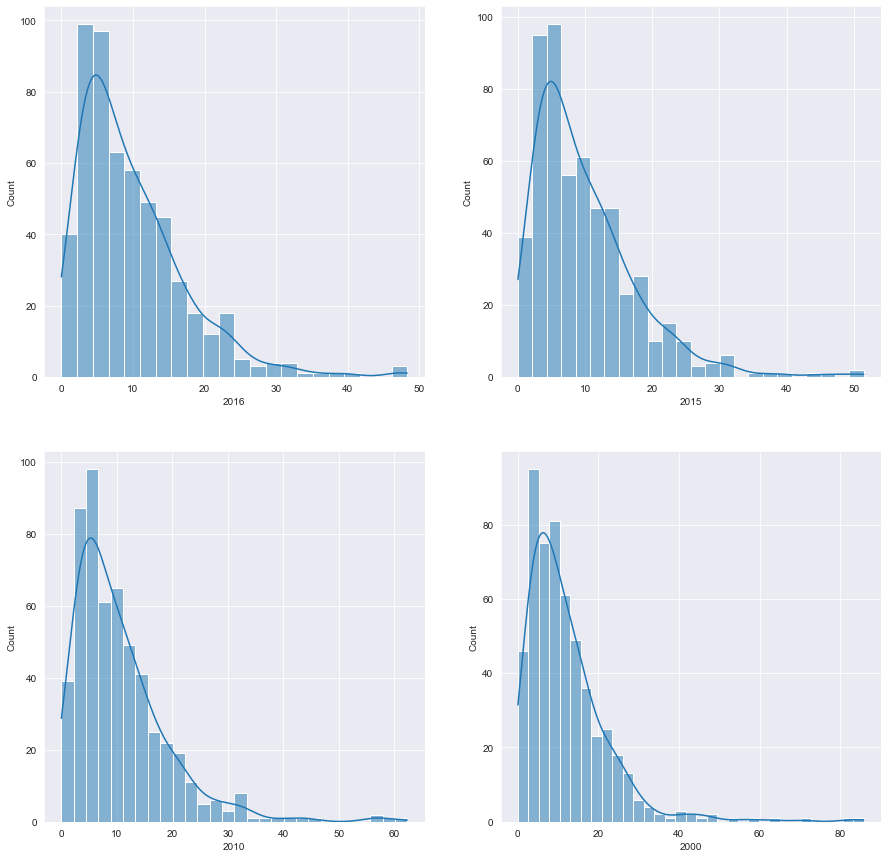

In [14]:
#=========== Plotting ==============#
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 2, figsize=(15,15))
vis1 = sns.histplot(age_standardized["2016"],ax=axes[0,0], kde = True)
vis3 = sns.histplot(age_standardized["2015"],ax=axes[0,1], kde = True)
vis3 = sns.histplot(age_standardized["2010"],ax=axes[1,0], kde = True)
vis4 = sns.histplot(age_standardized["2000"],ax=axes[1,1], kde = True)

Our projects Age standardized suicides rates file has four years datasets. The above plots y axes depict the average suicide rate average per one hundred thousand people. The x axes show suicide rate trends in different numbers buckets. 

The lowest zero to highest 85. The average suicide rate year 2000, 2010, 2015 and 2016 are 12.16,10.54,9.93 and 9.79 respectively. The downwards trends clearly noticeable. On the Sex level comparison, Male suicide rate is 18.13 in year 2000 compare to 14.60 in the year 2016, a staggering 3.53 points drop. On the contrary, Female suicides rate in the year 2000 was 6.37 compare to 5.09 in the year 2016, 1.28 points drop in 16 years.

From the above analysis, it is quite evident that historically Females are less like to commit suicide. It also shows that the overall suicide rate on years-to-years is reducing hence seems to have positive impact.


### 4. The Relation between Income Inequality and Suicide Rate in Countries

Having a better understanding of the factors that could lead to suicide (risk factors) in a general population is pivotal in designing the prevention programs. One factor that has long been suspected as one of the strongly associated factors associated with suicide risk is a socioeconomic condition [Qin et al, 2003]. 

This analysis will explore the relationship between suicide rate with income inequality that measures the disparity of an individual’s income or wealth within a group of people or a nation. 

A GINI coefficient is one indicator of quantifying income inequality where the value ranges from 0 to 1. A GINI of zero (0) expresses perfect equality, e.g., everyone has the same amount of income, whereas one (1) means extreme inequality where only one person has all the wealth, and the rest have none.


In [15]:
#load the socioeconomic indicators to a data.frame
#SuicideDataReader is a defined class/module to read the data from the data sources
socioeconomic = data_reader.read_data(SuicideRawData.SOCIOECONOMIC)
socioeconomic

,country,country_code,gini_latest_year,gini_coef,poverty_latest_year,poverty_199,poverty_320
0,Albania,ALB,2012,29.0,2017,1.3,8.2
1,Algeria,DZA,2011,27.6,2011,0.4,3.7
2,Angola,AGO,2008,42.7,2018,51.8,73.2
3,Argentina,ARG,2014,42.7,2018,1.3,3.9
4,Armenia,ARM,2015,32.4,2018,1.4,9.4
...,...,...,...,...,...,...,...
138,Uzbekistan,UZB,2003,35.3,2003,61.6,86.2
139,Vanuatu,VUT,2010,37.3,2010,13.2,39.4
140,Vietnam,VNM,2014,34.8,2018,1.9,6.8
141,Zambia,ZMB,2015,57.1,2015,58.7,75.4


In [16]:
#load the suicide rate to a data.frame
#SuicideDataReader is a defined class/module to read the data from the data sources
suiciderate = data_reader.read_data(SuicideRawData.SUICIDE_RATES, tidy = True)

#select "both sexes" only as no need to analyze by sex at the moment
suiciderate_bothsexes = suiciderate[suiciderate["sex"] == "Both sexes"]

#calculate the total number of suicide for all ages
suiciderate_bothsexes_allages = suiciderate_bothsexes.groupby("country", as_index = False)["suicide_rate"].sum()
suiciderate_bothsexes_allages

,country,suicide_rate
0,Afghanistan,93.2
1,Albania,65.1
2,Algeria,38.8
3,Angola,165.8
4,Antigua and Barbuda,8.1
...,...,...
178,Venezuela (Bolivarian Republic of),43.3
179,Viet Nam,89.4
180,Yemen,92.1
181,Zambia,204.9


In [17]:
#join both data frame for plotting purposes
suiciderate_socioeconomic = suiciderate_bothsexes_allages.merge(socioeconomic, on="country")

#classify GINI index into Low, High, and Severe 
#(based on classification from WorldBank: ...)
def gini_classification(gini):
    '''Classify the countries based on GINI coefficient that represent the severity of inequality in a particular country
    
       Parameter:
           gini (decimal) : gini coefficient
        
       Return:
           country classification that comprise of low, high, and severe inequality
    '''
    if (gini < 40):
        return "Low Inequality"
    elif (gini >= 40 and gini < 50):
        return "High Inequality"
    else:
        return "Severe Inequality"
    
suiciderate_socioeconomic = suiciderate_socioeconomic.\
    assign(gini_class = lambda x: x["gini_coef"].map(lambda y: gini_classification(y)))

suiciderate_socioeconomic

,country,suicide_rate,country_code,gini_latest_year,gini_coef,poverty_latest_year,poverty_199,poverty_320,gini_class
0,Albania,65.1,ALB,2012,29.0,2017,1.3,8.2,Low Inequality
1,Algeria,38.8,DZA,2011,27.6,2011,0.4,3.7,Low Inequality
2,Angola,165.8,AGO,2008,42.7,2018,51.8,73.2,High Inequality
3,Argentina,91.4,ARG,2014,42.7,2018,1.3,3.9,High Inequality
4,Armenia,84.9,ARM,2015,32.4,2018,1.4,9.4,Low Inequality
...,...,...,...,...,...,...,...,...,...
128,Uruguay,191.0,URY,2015,41.7,2018,0.1,0.4,High Inequality
129,Uzbekistan,64.6,UZB,2003,35.3,2003,61.6,86.2,Low Inequality
130,Vanuatu,78.8,VUT,2010,37.3,2010,13.2,39.4,Low Inequality
131,Zambia,204.9,ZMB,2015,57.1,2015,58.7,75.4,Severe Inequality


<function matplotlib.pyplot.show(close=None, block=None)>

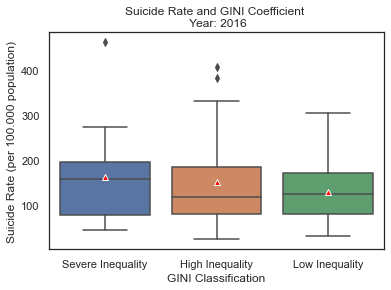

In [18]:
#plotting
sns.set_theme(style="white")

#plot suicide rate with GINI coefficient
sns.boxplot(data = suiciderate_socioeconomic, 
            x = "gini_class", 
            y = "suicide_rate", 
            order = ["Severe Inequality","High Inequality","Low Inequality"],
            showmeans = True,
            meanprops = {"markerfacecolor":"red", "markeredgecolor":"white"})
plt.title("Suicide Rate and GINI Coefficient \n Year: 2016")
plt.xlabel("GINI Classification")
plt.ylabel("Suicide Rate (per 100.000 population)")

plt.show

The plot above illustrates that the average number of suicides in countries with severe income inequality is higher than the other countries with a higher GINI coefficient (low or high inequality). There is an indication that the risk of suicide increases when the income gap in society is wider. Reducing income inequality might curb the risk of people in a society to commit suicide.

### 5. Association between available of facilities in mental health care sectors and suicide rates in countries

This purpose of this analysis was finding out any relationship between suicide rate and mental health care facilities. 

The chart above shows the average of facilities of in the recorded counties. Outpatient facilities were the most built facilities to handle mental health issues while the health units and mental hospitals were the least built facilities. It is because of the purpose of the facilities were different. The outpatient facilities mainly treat the outpatients with a wide range of services while mental hospitals treat inpatients with specialities. 

Both the number of mental hospitals, health units and outpatient facilities might have a slightly position correlation with suicide rate, it means the countries with higher suicide rate built these facilities more to handle the problems. Overall, the number of mental health facilities did not play an important role in suicide rate.

### 6. Association between the availability of workforce, human resources in mental health care sectors and suicide rates in countries:

Suicidal behaviours have multiple causes. The aim of this analysis is to investigate the influence of mental health professional availability over the suicide. The hypothesis here is that the countries which have more mental health care services have lower suicide rate.

The data is based on 2016 suicide rate data and human resource data in availability of psychiatrists, psychologists and nurses in mental healthcare sector in the countries in the world. Each observation represents the number of suicides in each country in Y-axis and health care staff count in X-axis. The figures are per 100,000 population.
